
## Javad Ranjbar Kermani
## CNN

In [1]:
# import libraries
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'The device is {device}')

1.13.1+cu116
The device is cuda


In [3]:
BATCH_SIZE = 256

## transformations
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

## download and load training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog',
           'horse', 'ship', 'truck')
print(type(classes))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
<class 'tuple'>


tensor([6, 3, 4, 3, 3, 4, 5, 8, 6, 6, 4, 5, 0, 4, 8, 8, 7, 0, 0, 8, 4, 4, 1, 1,
        5, 3, 2, 9, 9, 6, 9, 9, 6, 3, 1, 5, 4, 2, 1, 2, 0, 1, 4, 1, 0, 3, 8, 5,
        7, 0, 0, 2, 2, 4, 3, 4, 3, 2, 2, 1, 4, 4, 4, 8, 1, 8, 4, 8, 0, 2, 7, 7,
        1, 9, 6, 0, 1, 2, 2, 6, 5, 4, 0, 0, 2, 8, 0, 6, 9, 9, 0, 2, 6, 9, 6, 2,
        7, 4, 6, 5, 4, 8, 4, 5, 4, 6, 7, 2, 7, 7, 5, 7, 6, 9, 1, 5, 3, 9, 0, 2,
        8, 1, 3, 5, 8, 3, 7, 3, 7, 9, 2, 8, 3, 5, 8, 3, 7, 7, 2, 0, 7, 1, 7, 8,
        5, 7, 9, 5, 4, 0, 9, 3, 0, 3, 1, 5, 5, 5, 4, 4, 5, 4, 8, 8, 3, 6, 7, 5,
        4, 6, 0, 0, 6, 7, 6, 0, 1, 6, 3, 9, 6, 6, 4, 5, 3, 2, 5, 2, 3, 0, 3, 9,
        9, 9, 3, 7, 9, 1, 8, 2, 9, 5, 5, 9, 6, 5, 7, 0, 4, 4, 3, 9, 7, 1, 9, 8,
        7, 1, 9, 8, 3, 2, 1, 1, 0, 1, 4, 2, 0, 3, 5, 8, 2, 2, 9, 7, 5, 6, 8, 6,
        9, 2, 9, 7, 0, 0, 3, 5, 9, 6, 5, 0, 5, 1, 5, 6]) 

frog  cat   deer  cat   cat   deer  dog   ship  frog  frog  deer  dog   plane deer  ship  ship  horse plane plane ship  deer  deer  car   car

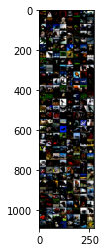

In [4]:
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

## show images
imshow(torchvision.utils.make_grid(images))
print(labels,'\n')
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(BATCH_SIZE)),'\n')

In [5]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([256, 3, 32, 32])
Image label dimensions: torch.Size([256])


In [6]:
from torch import nn
import torch.nn.functional as F
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Different convoloutional layer, kernel size and channel numbers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding = 1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding = 1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64,kernel_size=3, stride=1, padding = 1)
        #self.conv4 = nn.Conv2d(in_channels=24, out_channels=32,kernel_size=4, stride=1, padding = 1)
        self.layer1 = nn.Linear(4*4*64, 500)
        #self.layer1 = nn.Linear(3*3*32, 100)
        self.dropout1 = nn.Dropout(0.2)
        self.layer2 = nn.Linear(500, 10)
    def forward(self, x):
      
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x,2,2)
        #x = F.relu(self.conv4(x))
        #x = F.max_pool2d(x,2,2)
        x = x.view(-1,4*4*64)
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
        x = self.layer2(x)

        return x

In [7]:
import torch.optim as optim
model = CNN() # creat a object
model = model.to(device)
criterion = nn.CrossEntropyLoss() # loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum = 0.9) # stochastic gradient descent optimizer


In [8]:
epoch = 20  # number of epochs
train_loss_history = []
train_corrects_history = []
test_loss_history = []
test_corrects_history = []

for e in range(epoch):
  train_loss = 0
  train_corrects = 0
  test_loss = 0
  test_corrects = 0

  for inputs, labels in trainloader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs) # every batch is put as an input
    loss = criterion(outputs, labels) # Calc loss after each batch by comparing it to actual labels

    optimizer.zero_grad() # setting the initila gradient to zero
    loss.backward() # backpropagation the loss
    optimizer.step() # optimizing the weights and bias values for every single step 
    
    _, preds = torch.max(outputs, 1) # taking the highest value of prediction
    train_loss += loss.item()  # calculating the loss and adding to train_loss
    train_corrects += torch.sum(preds == labels.data) # calculating the accuracy by taking the sum of all correct prediction in a batch
  with torch.no_grad(): # no need fo gradient
    for test_inputs , test_labels in testloader:
      test_inputs = test_inputs.to(device)
      test_labels = test_labels.to(device)
      test_outputs = model(test_inputs) # every batch is put as an input
      loss_ = criterion(test_outputs,test_labels) # Calc loss after each batch by comparing it to actual labels
      _, test_preds = torch.max(test_outputs, 1) # taking the highest value of prediction
      test_loss += loss_.item() # calculating the loss and adding to train_loss
      test_corrects += torch.sum(test_preds == test_labels.data)  # calculating the accuracy by taking the sum of all correct prediction in a batch
  
  epoch_loss = train_loss/(len(trainloader)) # training loss per epoch
  epoch_acc = train_corrects/(len(trainloader)*BATCH_SIZE)*100 # training accuracy per epoch
  train_loss_history.append(epoch_loss)
  train_corrects_history.append(epoch_acc.cpu().numpy())

  test_epoch_loss = test_loss/(len(testloader)) # testing loss per epoch
  test_epoch_acc = test_corrects/(len(testloader)*BATCH_SIZE)*100 # testing accuracy per epoch
  test_loss_history.append(test_epoch_loss)
  test_corrects_history.append(test_epoch_acc.cpu().numpy())

  print('epoch :', (e+1))
  print('train loss: {:.4f}, train acc : {:.4f} '.format(epoch_loss, epoch_acc.item()))
  print('test loss: {:.4f}, test acc : {:.4f} '.format(test_epoch_loss, test_epoch_acc.item()))
       

epoch : 1
train loss: 2.1643, train acc 20.5118 
test loss: 1.8815, test acc 31.1816 
epoch : 2
train loss: 1.7039, train acc 37.9644 
test loss: 1.5405, test acc 42.7930 
epoch : 3
train loss: 1.4779, train acc 46.6996 
test loss: 1.4178, test acc 47.2461 
epoch : 4
train loss: 1.3441, train acc 51.4369 
test loss: 1.2740, test acc 53.1250 
epoch : 5
train loss: 1.2377, train acc 55.6162 
test loss: 1.1842, test acc 55.4492 
epoch : 6
train loss: 1.1288, train acc 59.6999 
test loss: 1.1492, test acc 57.4414 
epoch : 7
train loss: 1.0466, train acc 62.6236 
test loss: 1.0410, test acc 61.2402 
epoch : 8
train loss: 0.9706, train acc 65.5034 
test loss: 1.0271, test acc 62.1973 
epoch : 9
train loss: 0.9059, train acc 67.9050 
test loss: 0.9407, test acc 65.2148 
epoch : 10
train loss: 0.8405, train acc 70.1212 
test loss: 0.9309, test acc 65.7520 
epoch : 11
train loss: 0.7955, train acc 71.9507 
test loss: 0.9196, test acc 66.2207 
epoch : 12
train loss: 0.7328, train acc 74.1291 
te

In [9]:
# saving the model
PATH = './Q7_a.h5'
torch.save(model.state_dict(), PATH)

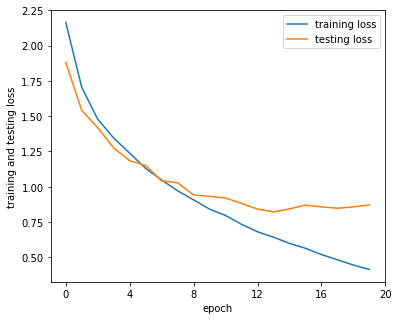

In [10]:
# plot test and train loss with respect to number of epochs
import math
plt.figure(figsize=(6,5))
plt.plot(train_loss_history, label= 'training loss')
plt.plot(test_loss_history, label= 'testing loss')
X = [0,4,8,12,16,20]
new_list = range(math.floor(min(X)), math.ceil(max(X))+1, 4)
plt.xticks(new_list)
plt.xlabel('epoch')
plt.ylabel('training and testing loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

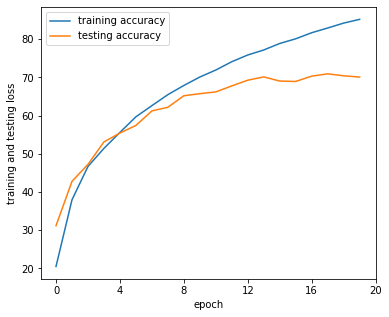

In [11]:
# plot test and train accuracy with respect to number of epochs
plt.figure(figsize=(6,5))
plt.plot(train_corrects_history, label= 'training accuracy')
plt.plot(test_corrects_history, label= 'testing accuracy')
X = [0,4,8,12,16,20]
new_list = range(math.floor(min(X)), math.ceil(max(X))+1, 4)
plt.xticks(new_list)
plt.xlabel('epoch')
plt.ylabel('training and testing loss')
plt.legend()
plt.show

In [12]:
model = CNN()
model.load_state_dict(torch.load(PATH))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  car   frog  plane dog  


In [13]:
# accuracy of each class
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predictions == labels).sum().item()
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy for class: plane is 78.9 %
Accuracy for class: car   is 86.0 %
Accuracy for class: bird  is 55.5 %
Accuracy for class: cat   is 46.1 %
Accuracy for class: deer  is 67.3 %
Accuracy for class: dog   is 64.8 %
Accuracy for class: frog  is 81.7 %
Accuracy for class: horse is 72.4 %
Accuracy for class: ship  is 87.4 %
Accuracy for class: truck is 79.8 %
Accuracy of the network on the 10000 test images: 71 %
